In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

headings = ['age','gender','total_bilirubin','direct_bilirubin','total_proteins','albumin','ag_ratio','sgpt','sgot','alkphos','is_patient']
data = pd.read_csv("ILPD.csv", names = headings)
data.head()

,age,gender,total_bilirubin,direct_bilirubin,total_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [2]:
X = data.drop('is_patient',axis=1)
y = data['is_patient']

print("Total number of sample:",data.shape[0],"\nNo.of features in each sample:",data.shape[1])

Total number of sample: 583 
No.of features in each sample: 11


In [3]:
duplicates = data[data.duplicated(keep=False)]
duplicates

,age,gender,total_bilirubin,direct_bilirubin,total_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [4]:
print("No. of duplicate values:",duplicates.shape[0],"\nSize of data: ",data.shape)

No. of duplicate values: 26 
Size of data:  (583, 11)


In [29]:
data.isnull().sum()


age                 0
gender              0
total_bilirubin     0
direct_bilirubin    0
total_proteins      0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [30]:
data = data.dropna()
data.isnull().sum()

age                 0
gender              0
total_bilirubin     0
direct_bilirubin    0
total_proteins      0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

In [31]:
data.shape


(579, 11)

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# is_patient = 1, is_not_patient = 0
data['is_patient'] = le.fit_transform(~data['is_patient'])
data['is_patient'].unique()

X = data.drop('is_patient', axis=1)
y = data['is_patient']

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


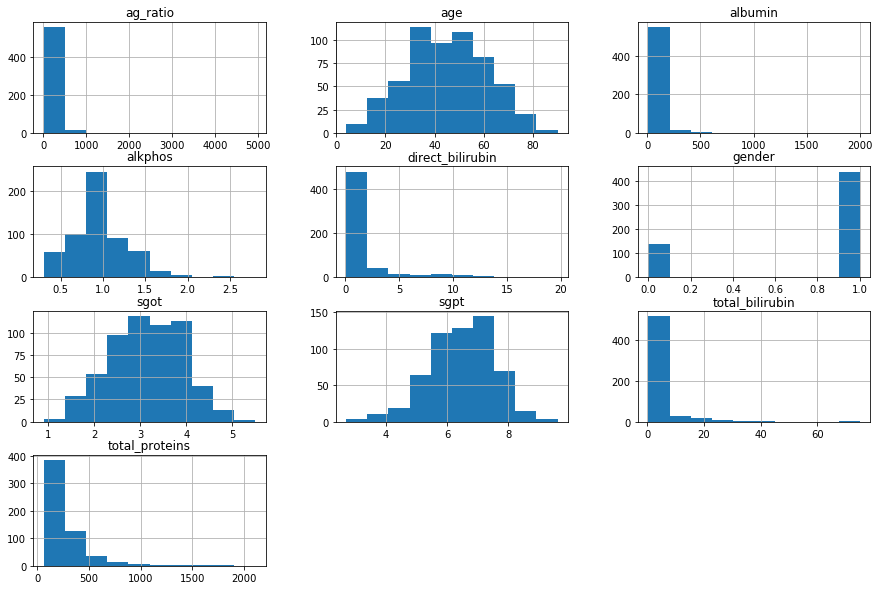

In [34]:
X.hist(figsize=(15,10))
plt.ylabel("Frequency")
plt.show()

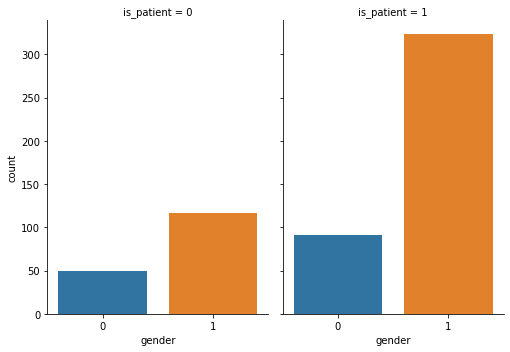

In [35]:
sns.catplot(x="gender",col="is_patient",data=data,kind="count",height=5,aspect=.7)


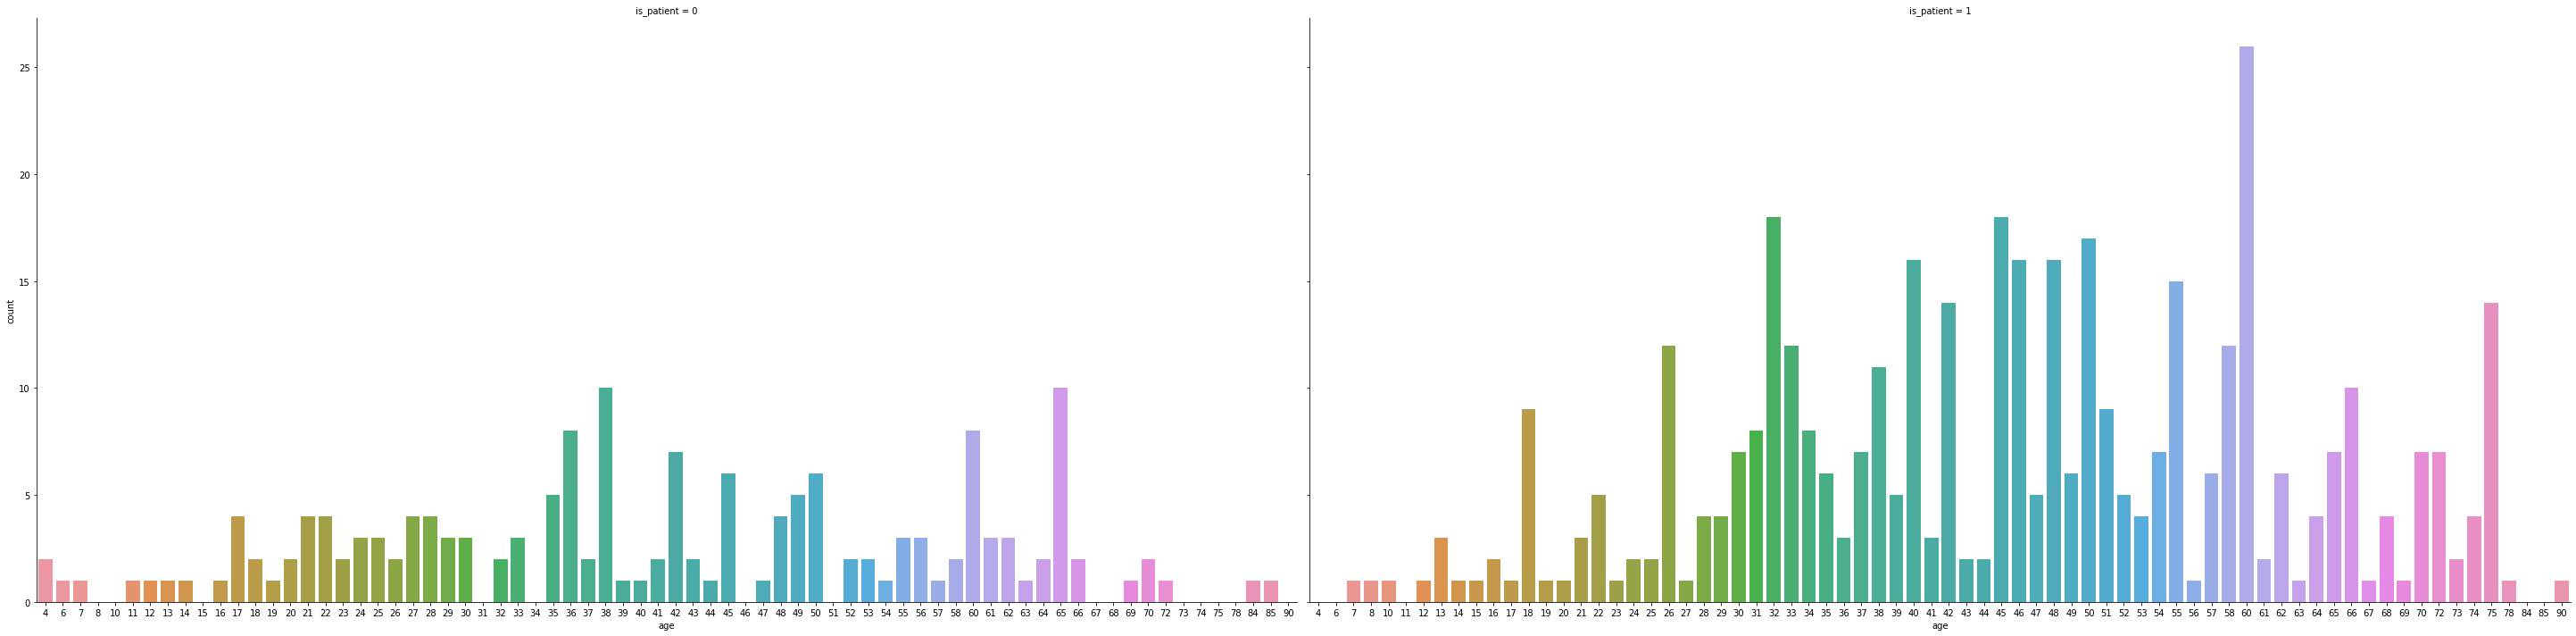

In [36]:
sns.catplot(x="age",col="is_patient",data=data,kind="count",height=10,aspect=2.0)


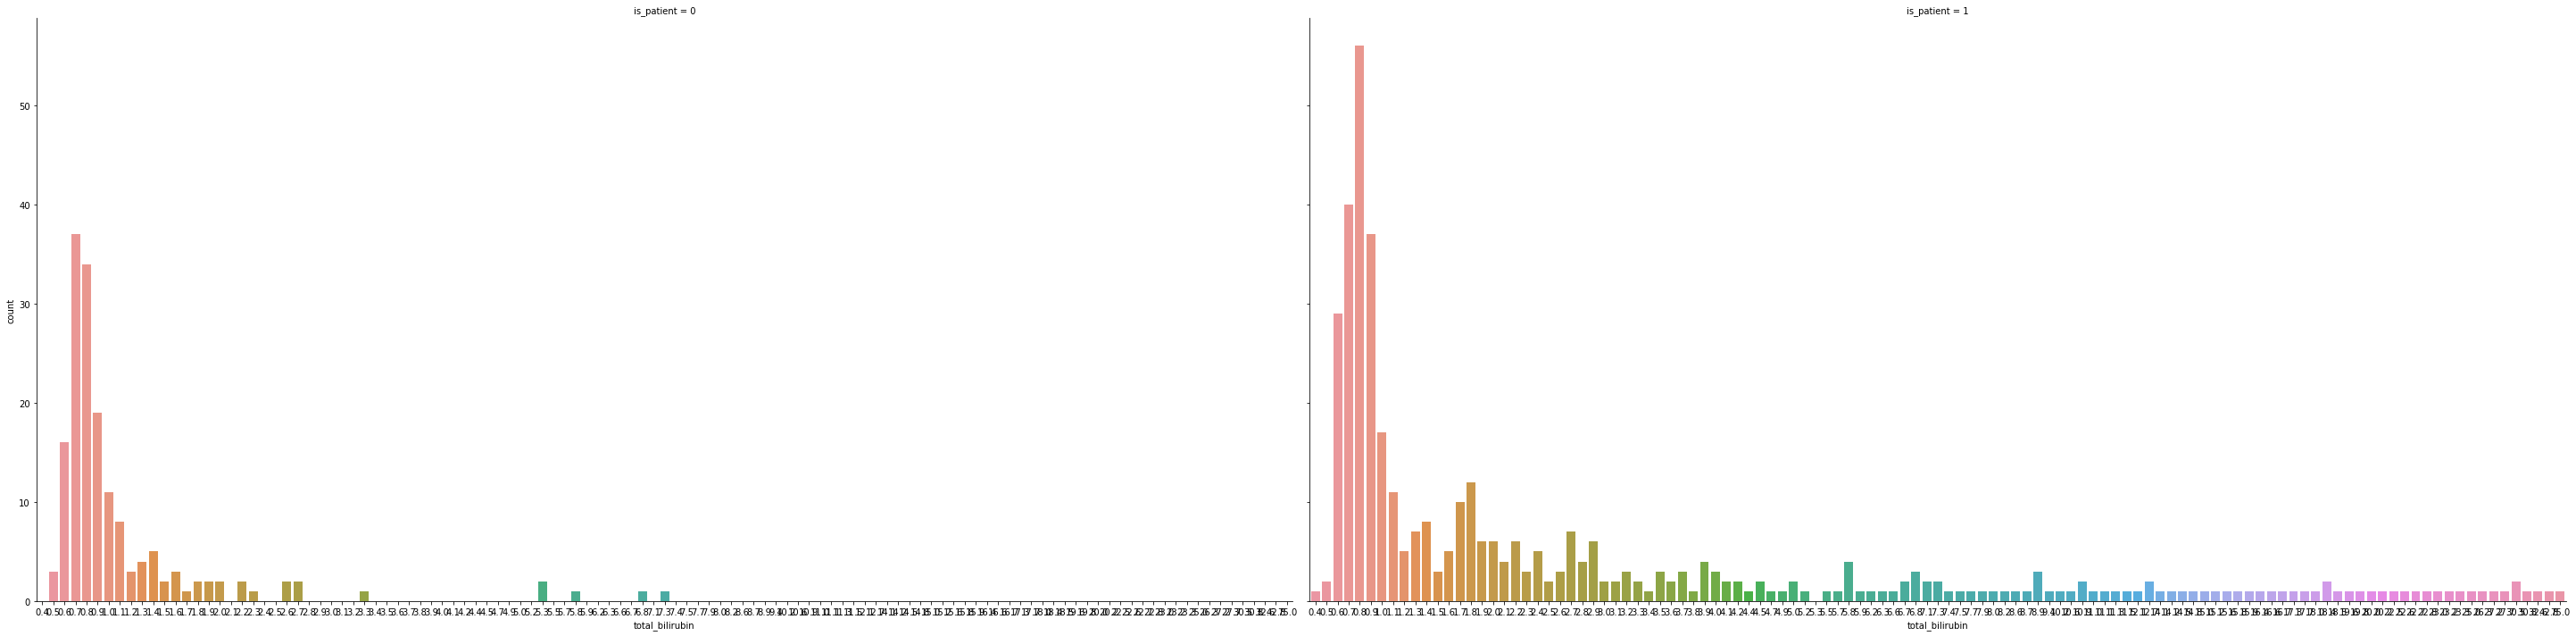

In [37]:
sns.catplot(x="total_bilirubin",col="is_patient",data=data,kind="count",height=10,aspect=2.0)


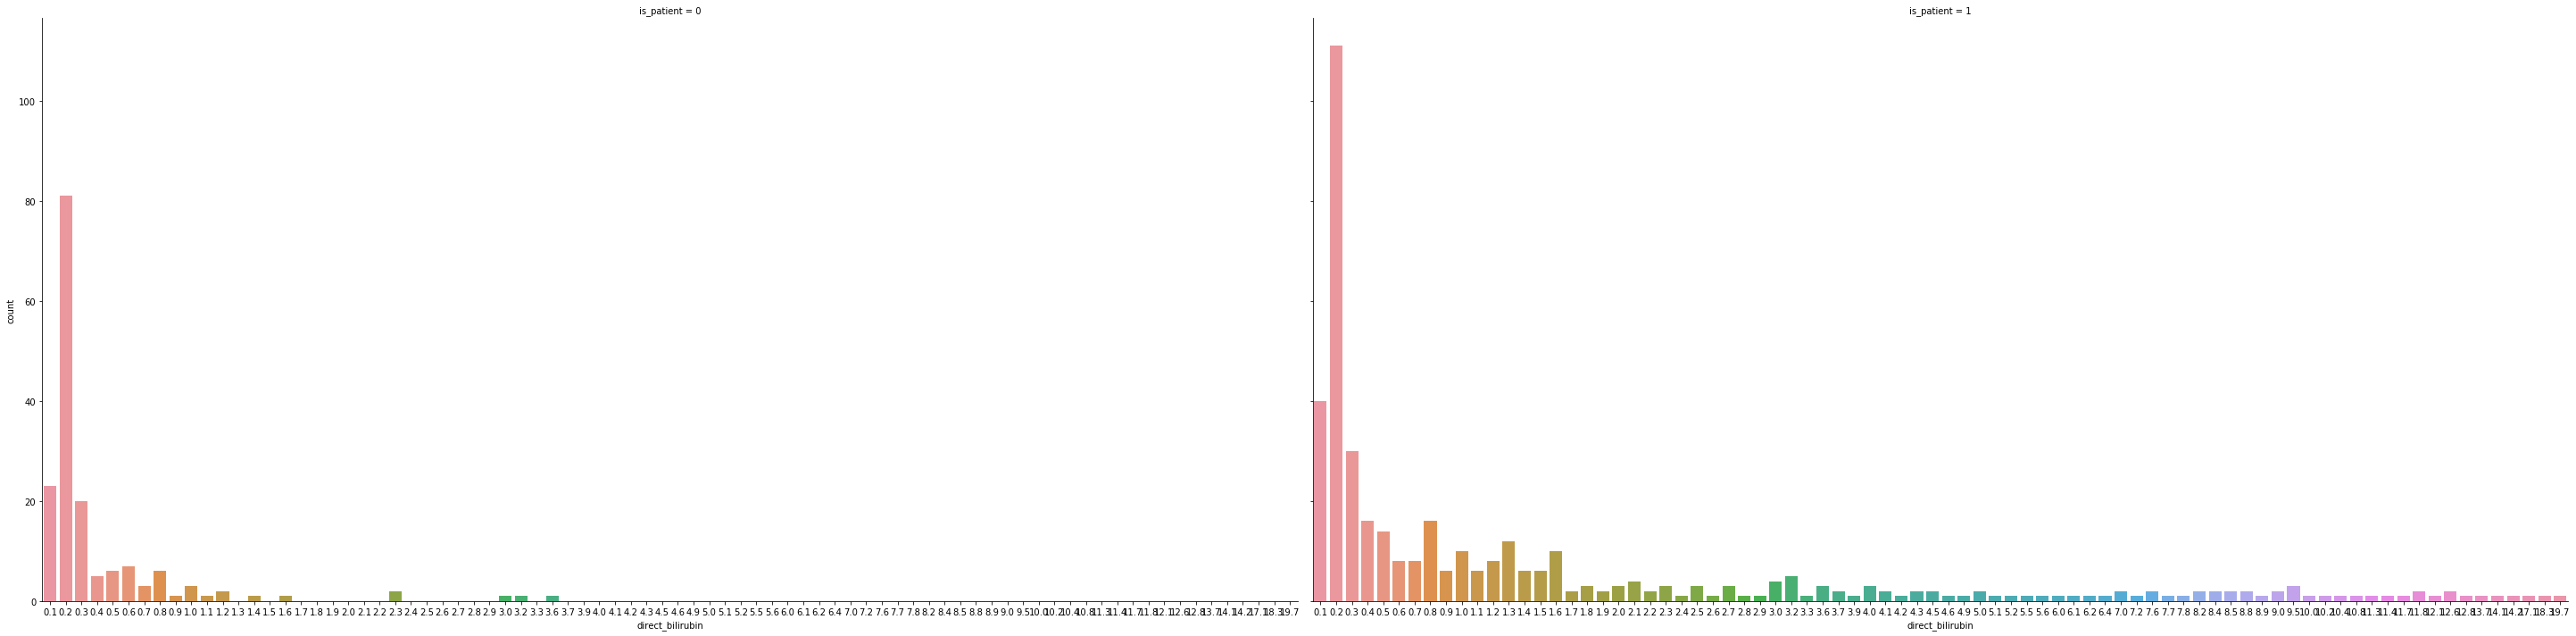

In [38]:
sns.catplot(x="direct_bilirubin",col="is_patient",data=data,kind="count",height=10,aspect=2.0)


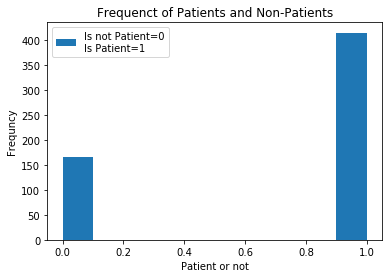

In [39]:
#sns.catplot(x="is_patient",col="is_patient",data=data,kind="count",height=5,aspect=.7)
plt.hist(y,label='Is not Patient=0\nIs Patient=1')
plt.xlabel("Patient or not")
plt.ylabel("Frequncy")
plt.title("Frequenct of Patients and Non-Patients")
plt.legend()
plt.show()

In [40]:
data['gender'] = le.fit_transform(data['gender'])
# female = 0, male = 1

X = data.drop('is_patient', axis=1)
y = data['is_patient']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Accuracy: 0.7327586206896551
Precision: 0.7280701754385965
Recall: 1.0


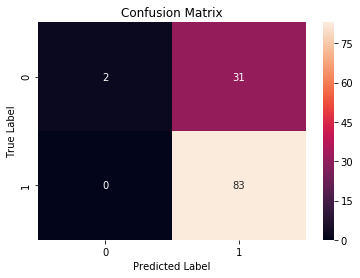

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=3444)

reg = LogisticRegression(solver='newton-cg')

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix,annot=True,cbar=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

print("Accuracy:",accuracy)
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Logistic: ROC AUC=0.752


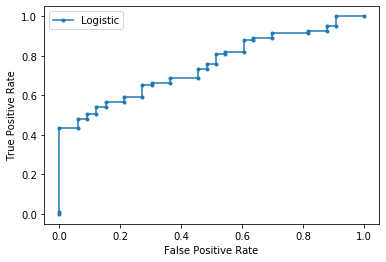

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

lr_probs = reg.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:,1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()